Deep feedforward netwok will have 4 hidden layers


*   The first hidden layer will have 128 nodes
*   We also use ReLU function 

Our Neural network model look like
*   Input layer (17 features)
*   1st hidden layer (128 nodes)

*   2nd hidden layer (64 nodes)
*   3rd hidden layer (32 nodes)


*   4th hidden layer (8 nodes)
*   Output layer (1 node)






---
Loss functions for regression problems


*   In regreesion, We are trying to predict the value of a continous variable (for example, cost time or height)
*   In classification we will try to predict a class

RMSE = sqrt((prediction-actual)^2)


In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\HAI\course files\train.csv', parse_dates=['pickup_datetime'], nrows=500000)

There are 8 columns in the dataset:


1.   Key: this column seems identical to the pickup_datetime column. It was probably used as an unique identifier in the database where it was stored in. We can safely remove it without any loss of information

1.   fare_amount: This is the target variable we are trying to predict, the fare amount paid at the end of the trip

1.   pickup_datetime: This column conatins information ont eh pickup date (year, month, day of month), as well as the time (hour, minute and seconds)

1.   pickup_longtitude and pickup_latitude: The longtitude and latitude of the pickup location
2.   dropoff_longtitude and dropoff_latitude: The longtitude and latitude of the dropoff location


2.   passenger_count: The no of passengers.

In [3]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

df2 = df.copy(deep=True)
for long in ['pickup_longitude', 'dropoff_longitude']:
    df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] <
                                                 nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] < 
                                               nyc_max_latitude)]

In [4]:
landmarks = {'JFK Airport': (-73.78, 40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

In [5]:
import matplotlib.pyplot as plt

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # set figure size
    if points == 'pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), 
                 '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), 
                 '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], 
                '*', markersize=15, alpha=1, color='r') 
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, 
                     landmarks[landmark][1]+0.005), color='r', 
                     backgroundcolor='w') 

    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

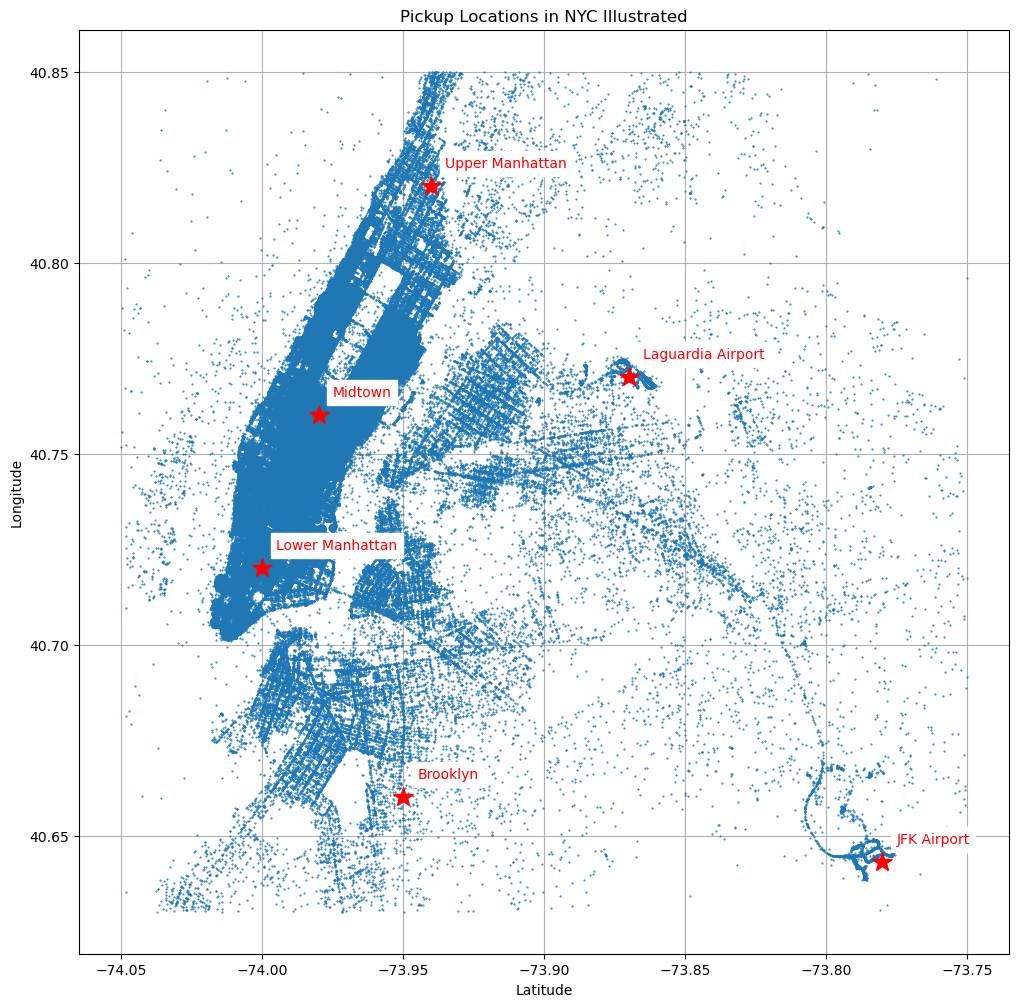

In [6]:
plot_lat_long(df2, landmarks, points='Pickup')

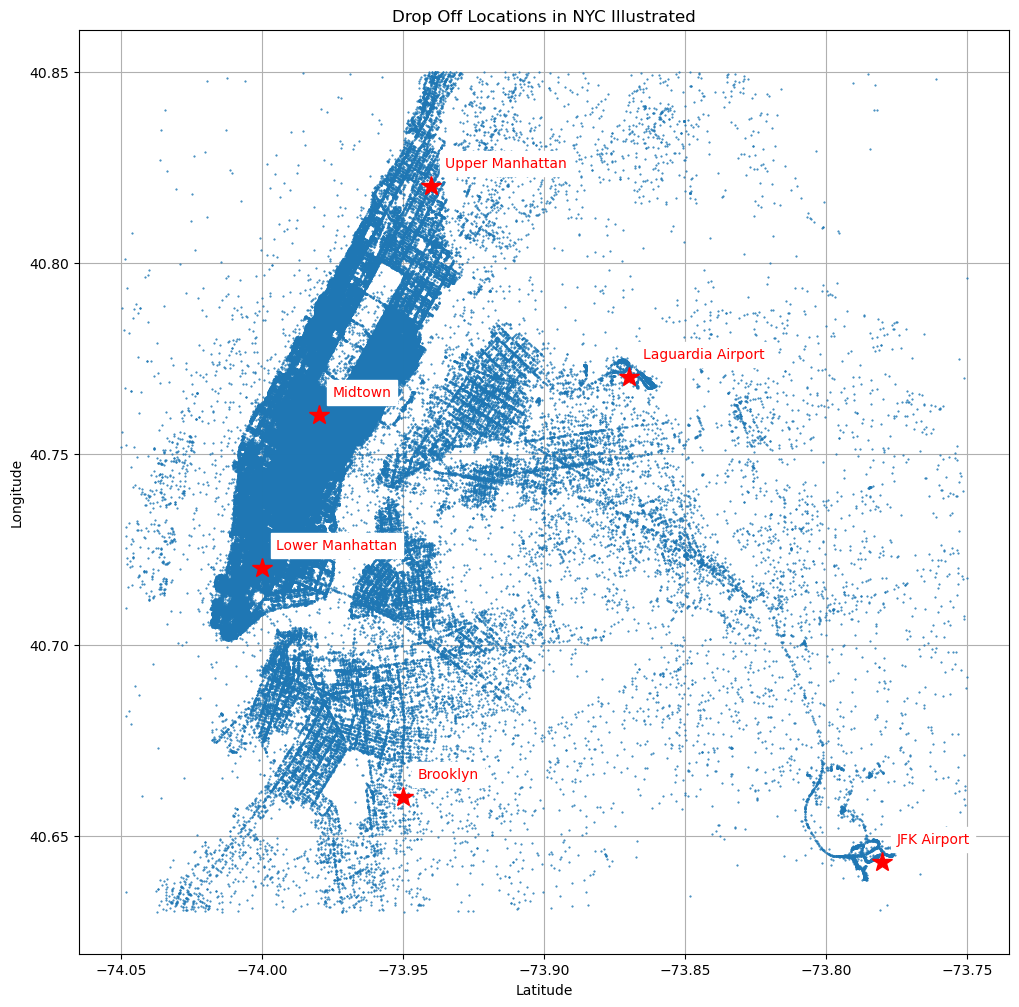

In [7]:
plot_lat_long(df2, landmarks, points='Drop Off')

In [8]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

df['hour'] = df['pickup_datetime'].dt.hour

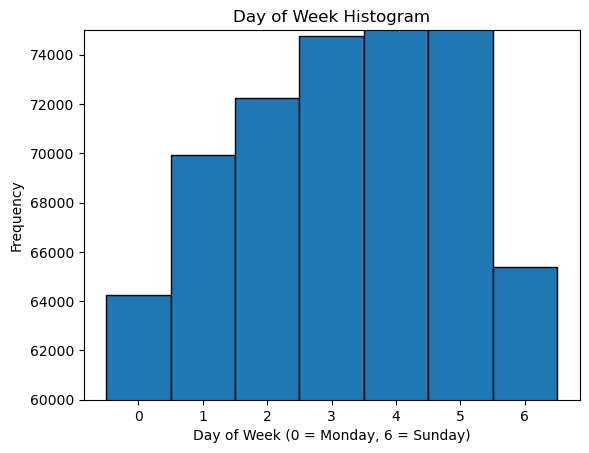

In [9]:
import numpy as np

df['day_of_week'].plot.hist(bins=np.arange(8) - 0.5, ec ='black',ylim=(60000,75000))
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.title('Day of Week Histogram')

plt.show()

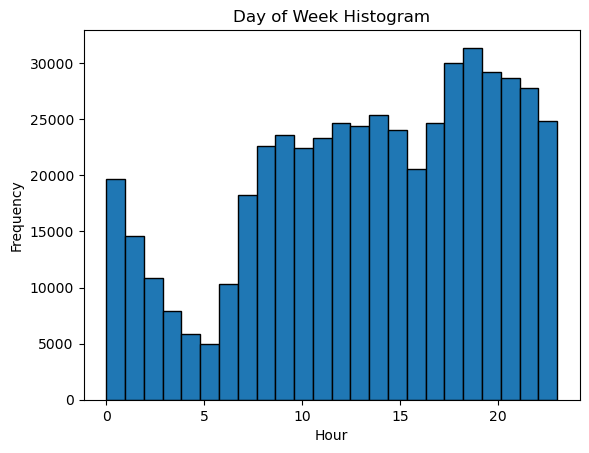

In [10]:
df['hour'].plot.hist(bins=24, ec ='black')

plt.title('Day of Week Histogram')
plt.xlabel('Hour')
plt.show()

In [11]:
# Handling missing values and data anomalies
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [12]:
df = df.dropna()

In [13]:
print(df.describe())

         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  499995.000000     499995.000000    499995.000000      499995.000000   
mean       11.358182        -72.520091        39.920350         -72.522435   
std         9.916069         11.856446         8.073318          11.797362   
min       -44.900000      -2986.242495     -3116.285383       -3383.296608   
25%         6.000000        -73.992047        40.734916         -73.991382   
50%         8.500000        -73.981785        40.752670         -73.980126   
75%        12.500000        -73.967117        40.767076         -73.963572   
max       500.000000       2140.601160      1703.092772          40.851027   

       dropoff_latitude  passenger_count           year          month  \
count     499995.000000    499995.000000  499995.000000  499995.000000   
mean          39.916526         1.683445    2011.739129       6.268617   
std            7.391002         1.307391       1.860897       3.437798   
m

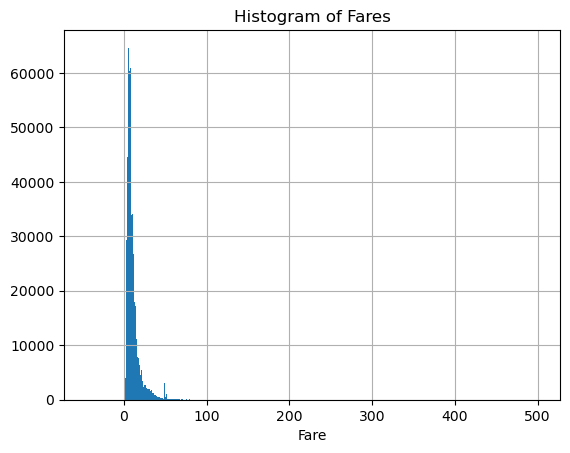

In [14]:
df['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

In [15]:
df = df[(df['fare_amount'] >=0) & (df['fare_amount'] <= 100)]

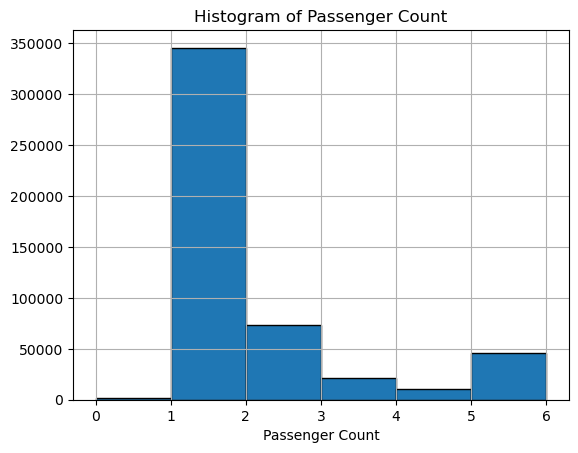

In [16]:
df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

In [17]:
df.loc[df['passenger_count'] == 0,'passenger_count'] = 1

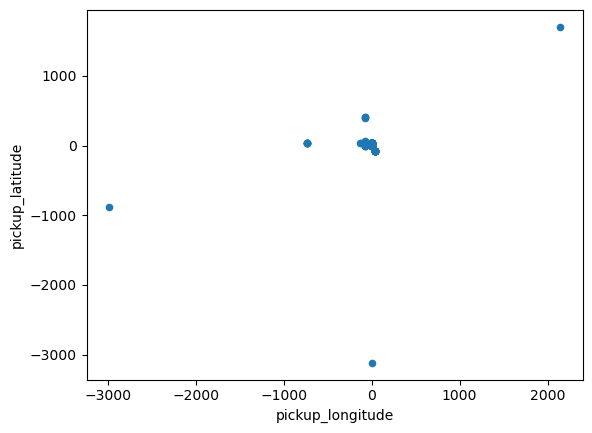

In [18]:
df.plot.scatter('pickup_longitude','pickup_latitude')
plt.show()

In [19]:
# range of longitude for NYC
nyc_min_longitude= -74.05
nyc_max_longitude = -73.75
# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85
# Only consider locations within NYC
for long in ['pickup_longitude','dropoff_longitude']:
  df = df[(df[long]> nyc_min_longitude) & (df[long]< nyc_max_longitude)]
for lat in ['pickup_latitude','dropoff_latitude']:
  df = df[(df[lat]> nyc_min_latitude) & (df[lat]< nyc_max_latitude)]

In [20]:
def preprocess(df): 
    # remove missing values in the dataframe
    def remove_missing_values(df):
        df = df.dropna()
        return df

    # remove outliers in fare amount
    def remove_fare_amount_outliers(df, lower_bound, upper_bound):
        df = df[(df['fare_amount'] >= lower_bound) & 
                (df['fare_amount'] <= upper_bound)]
        return df

    # replace outliers in passenger count with the mode
    def replace_passenger_count_outliers(df):
        mode = df['passenger_count'].mode()
        df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode
        return df

    # remove outliers in latitude and longitude
    def remove_lat_long_outliers(df):
        # range of longitude for NYC
        nyc_min_longitude = -74.05
        nyc_max_longitude = -73.75
        # range of latitude for NYC
        nyc_min_latitude = 40.63
        nyc_max_latitude = 40.85
        # only consider locations within New York City
        for long in ['pickup_longitude', 'dropoff_longitude']:
            df = df[(df[long] > nyc_min_longitude) & 
                    (df[long] < nyc_max_longitude)]
        for lat in ['pickup_latitude', 'dropoff_latitude']:
            df = df[(df[lat] > nyc_min_latitude) & 
                    (df[lat] < nyc_max_latitude)]
        return df

    df = remove_missing_values(df)
    df = remove_fare_amount_outliers(df, lower_bound = 0, 
                                     upper_bound = 100)
    df = replace_passenger_count_outliers(df)
    df = remove_lat_long_outliers(df)
    return df

In [21]:
# Temporal features
print(df.head()['pickup_datetime'])

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]


In [22]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

In [23]:
print(df.loc[:5,['pickup_datetime','year','month','day','day_of_week','hour']])

            pickup_datetime  year  month  day  day_of_week  hour
0 2009-06-15 17:26:21+00:00  2009      6   15            0    17
1 2010-01-05 16:52:16+00:00  2010      1    5            1    16
2 2011-08-18 00:35:00+00:00  2011      8   18            3     0
3 2012-04-21 04:30:42+00:00  2012      4   21            5     4
4 2010-03-09 07:51:00+00:00  2010      3    9            1     7
5 2011-01-06 09:50:45+00:00  2011      1    6            3     9


In [24]:
df=df.drop(['pickup_datetime'],axis=1)

In [25]:
def euc_distance(lat1,long1,lat2,long2):
  return(((lat1-lat2)**2) + ((long1-long2)**2) **0.5)

In [26]:
df['distance'] = euc_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

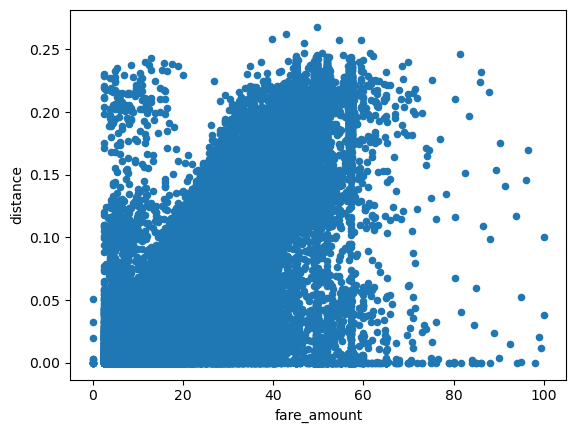

In [27]:
df.plot.scatter('fare_amount','distance')
plt.show()

In [28]:
airports = {'JFK_Airport': (-73.78,40.643),
            'Laguardia_Airport': (-73.87, 40.77),
            'Newark_Airport' : (-74.18, 40.69)}

for airport in airports:
    df['pickup_dist_' + airport] = euc_distance(df['pickup_latitude'],
                                                df['pickup_longitude'], 
                                                airports[airport][1], 
                                                airports[airport][0])
    df['dropoff_dist_' + airport] = euc_distance(df['dropoff_latitude'], 
                                                 df['dropoff_longitude'],
                                                 airports[airport][1], 
                                                 airports[airport][0])

In [29]:
print(df[['key', 'pickup_longitude','pickup_latitude',
          'dropoff_longitude','dropoff_latitude', 
          'pickup_dist_JFK_Airport',
          'dropoff_dist_JFK_Airport']].head())

                             key  pickup_longitude  pickup_latitude  \
0    2009-06-15 17:26:21.0000001        -73.844311        40.721319   
1    2010-01-05 16:52:16.0000002        -74.016048        40.711303   
2   2011-08-18 00:35:00.00000049        -73.982738        40.761270   
3    2012-04-21 04:30:42.0000001        -73.987130        40.733143   
4  2010-03-09 07:51:00.000000135        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  pickup_dist_JFK_Airport  \
0         -73.841610         40.712278                 0.070445   
1         -73.979268         40.782004                 0.240713   
2         -73.991242         40.750562                 0.216726   
3         -73.991567         40.758092                 0.215256   
4         -73.956655         40.783762                 0.203722   

   dropoff_dist_JFK_Airport  
0                  0.066409  
1                  0.218590  
2                  0.222812  
3                  0.224813  
4                  0

In [30]:
df = df.drop(['key'], axis=1)

In [31]:
def feature_engineer(df):
    # create new columns for year, month, day, day of week and hour
    def create_time_features(df):
        df['year'] = df['pickup_datetime'].dt.year
        df['month'] = df['pickup_datetime'].dt.month
        df['day'] = df['pickup_datetime'].dt.day
        df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
        df['hour'] = df['pickup_datetime'].dt.hour
        df = df.drop(['pickup_datetime'], axis=1)
        return df

    # function to calculate euclidean distance
    def euc_distance(lat1, long1, lat2, long2):
        return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

    # create new column for the distance travelled
    def create_pickup_dropoff_dist_features(df):
        df['travel_distance'] = euc_distance(df['pickup_latitude'], 
                                             df['pickup_longitude'], 
                                             df['dropoff_latitude'],
                                             df['dropoff_longitude'])
        return df

    # create new column for the distance away from airports
    def create_airport_dist_features(df):
        airports = {'JFK_Airport': (-73.78,40.643),
                    'Laguardia_Airport': (-73.87, 40.77),
                    'Newark_Airport' : (-74.18, 40.69)}
        for k in airports:
          df['pickup_dist_'+k]=euc_distance(df['pickup_latitude'], 
                                              df['pickup_longitude'],
                                              airports[k][1],
                                              airports[k][0])
          df['dropoff_dist_'+k]=euc_distance(df['dropoff_latitude'], 
                                               df['dropoff_longitude'],
                                               airports[k][1],
                                               airports[k][0]) 
        return df

    df = create_time_features(df)
    df = create_pickup_dropoff_dist_features(df)
    df = create_airport_dist_features(df)
    df = df.drop(['key'], axis=1)
    return df

In [32]:
df_prescaled = df.copy()
df_scaled = df.drop(['fare_amount'],axis=1)
from sklearn.preprocessing import scale
df_scaled = scale(df_scaled)
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled,columns =cols, index=df.index)
df_scaled = pd.concat([df_scaled,df['fare_amount']], axis=1)
df = df_scaled.copy()

In [33]:
X = df.loc[:, df.columns != 'fare_amount'] 
y = df.loc[:, 'fare_amount']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation= 'relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12913 (50.44 KB)
Trainable params: 12913 (50.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=1)




12086/12086 [==============================] - 30s 2ms/step - loss: 14.1878 - mse: 14.1878


In [38]:
def predict_random(df_prescaled, X_test, model):
    sample = X_test.sample(n=1, random_state=np.random.randint(low=0, high = 10000))
    idx = sample.index[0]
    actual_fare = df_prescaled.loc[idx,'fare_amount']
    day_names = [
               'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
    ]
    day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
    hour = df_prescaled.loc[idx,'hour']
    predicted_fare = model.predict(sample)[0][0]
    rmse = np.sqrt(np.square(predicted_fare-actual_fare))
    print("Trip Details: {}, {}:00hrs".format(day_of_week,hour))
    print("Actual fare: ${:0.2f}".format(actual_fare))
    print("Predicted fare: ${:0.2f}".format(predicted_fare))

    print("RMSE: ${:0.2f}".format(rmse))

In [39]:
predict_random(df_prescaled,X_test, model)

1/1 [==============================] - 0s 172ms/step
Trip Details: Sunday, 0:00hrs
Actual fare: $5.70
Predicted fare: $5.39
RMSE: $0.31


In [41]:
predict_random(df_prescaled,X_test, model)

1/1 [==============================] - 0s 36ms/step
Trip Details: Saturday, 15:00hrs
Actual fare: $8.10
Predicted fare: $8.30
RMSE: $0.20


In [42]:
predict_random(df_prescaled,X_test, model)

1/1 [==============================] - 0s 38ms/step
Trip Details: Monday, 3:00hrs
Actual fare: $9.30
Predicted fare: $9.74
RMSE: $0.44


In [44]:
predict_random(df_prescaled,X_test, model)

1/1 [==============================] - 0s 40ms/step
Trip Details: Tuesday, 23:00hrs
Actual fare: $7.30
Predicted fare: $7.97
RMSE: $0.67


In [46]:
predict_random(df_prescaled,X_test, model)

1/1 [==============================] - 0s 37ms/step
Trip Details: Friday, 23:00hrs
Actual fare: $28.10
Predicted fare: $38.28
RMSE: $10.18


In [40]:
from sklearn.metrics import mean_squared_error
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

print("Train RMSE: {:0.2f}".format(train_rmse))

print("Test RMSE: {:0.2f}".format(test_rmse))

3022/3022 [==============================] - 6s 2ms/step
Train RMSE: 3.51
Test RMSE: 3.56
